# Movie Genre Classification

### Problem Statement:

Create a machine learning model that can predict the genre of a movie based on its plot summary or other textual information. You can use techniques like TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, or Support Vector Machines.


### Domain Analysis:
Movie genre classification holds significant importance in various aspects of the entertainment industry and beyond.
In essence, it is a foundational element that permeates various aspects of the entertainment industry, from user experience and marketing to content production and industry analysis. It facilitates a more efficient and personalized interaction between viewers and the vast array of available content.

Movie genre classification using machine learning involves training a model to automatically categorize movies into different genres based on their features(here based on their discription available).

In [42]:
# Import the required libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import string
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(18,8)},style='darkgrid')
from time import time
from googletrans import Translator
from langdetect import detect
import pycountry
import re
import nltk
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Load the dataset

data = pd.read_csv(r"C:\Users\pares\OneDrive\Documents\codsoft_internship\Genre Classification Dataset\train_data.txt",
                    sep=':::',names=['Title', 'Genre', 'Description']).reset_index(drop=True)
data

C:\Users\pares\AppData\Local\Temp\ipykernel_10748\2186741577.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(r"C:\Users\pares\OneDrive\Documents\codsoft_internship\Genre Classification Dataset\train_data.txt",


,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [3]:
test_data = pd.read_csv(r"C:\Users\pares\OneDrive\Documents\codsoft_internship\Genre Classification Dataset\test_data.txt",
                  sep=':::',names=['Title', 'Description']).reset_index(drop=True)
test_data

C:\Users\pares\AppData\Local\Temp\ipykernel_10748\3702594279.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv(r"C:\Users\pares\OneDrive\Documents\codsoft_internship\Genre Classification Dataset\test_data.txt",


,Title,Description
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...
54195,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [4]:
y_actual = pd.read_csv(r"C:\Users\pares\OneDrive\Documents\codsoft_internship\Genre Classification Dataset\test_data_solution.txt",
                      sep=':::',names=['Genre', 'Description']).reset_index(drop=True)

C:\Users\pares\AppData\Local\Temp\ipykernel_10748\2429885224.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  y_actual = pd.read_csv(r"C:\Users\pares\OneDrive\Documents\codsoft_internship\Genre Classification Dataset\test_data_solution.txt",


In [5]:
y_actual.head()

,Genre,Description
0,thriller,"L.R. Brane loves his life - his car, his apar..."
1,comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,documentary,One year in the life of Albin and his family ...
3,drama,"His father has died, he hasn't spoken with hi..."
4,drama,Before he was known internationally as a mart...


In [6]:
merged_test_data=pd.merge(test_data, y_actual, on='Description', how='inner')

In [7]:
merged_test_data

,Title,Description,Genre
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",thriller
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",comedy
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",drama
4,Er nu zhai (1955),Before he was known internationally as a mart...,drama
...,...,...,...
54713,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",horror
54714,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,western
54715,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,adult
54716,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",drama


## EDA

In [8]:
# Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [9]:
#Descriptions included HTTP links
data.loc[data['Description'].str.contains(r'http\S+')].shape[0]

9

In [10]:
data['Genre'].value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

In [11]:
genre_class=data['Genre'].unique()
genre_class

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

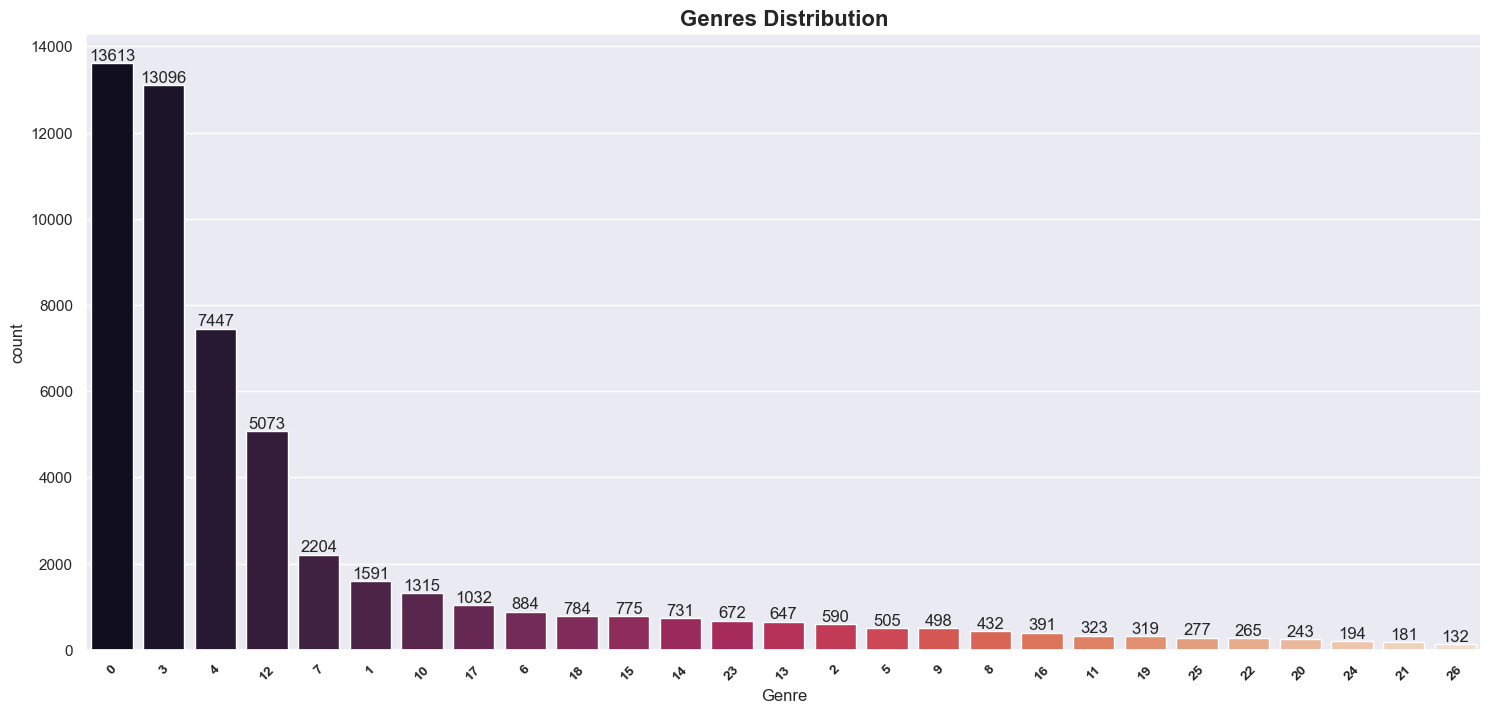

In [43]:
ax=sns.countplot(data=data,x='Genre',order=data.Genre.value_counts().index,palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Genres Distribution',fontweight='bold',fontsize=16)
plt.xticks(rotation=45,fontweight='bold',fontsize=10)
plt.show()

### Text preprocessing

In [12]:
print("Genre mapping")
e=0
for i in genre_class:
    print(f"{i}:{e}")
    data.loc[data['Genre']==i,'Genre']=e
    merged_test_data.loc[merged_test_data['Genre']==i,'Genre']=e
    e+=1

Genre mapping
 drama :0
 thriller :1
 adult :2
 documentary :3
 comedy :4
 crime :5
 reality-tv :6
 horror :7
 sport :8
 animation :9
 action :10
 fantasy :11
 short :12
 sci-fi :13
 music :14
 adventure :15
 talk-show :16
 western :17
 family :18
 mystery :19
 history :20
 news :21
 biography :22
 romance :23
 game-show :24
 musical :25
 war :26


In [13]:
data

,Title,Genre,Description
0,Oscar et la dame rose (2009),0,Listening in to a conversation between his do...
1,Cupid (1997),1,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",2,As the bus empties the students for their fie...
3,The Secret Sin (1915),0,To help their unemployed father make ends mee...
4,The Unrecovered (2007),0,The film's title refers not only to the un-re...
...,...,...,...
54209,"""Bonino"" (1953)",4,This short-lived NBC live sitcom centered on ...
54210,Dead Girls Don't Cry (????),7,The NEXT Generation of EXPLOITATION. The sist...
54211,Ronald Goedemondt: Ze bestaan echt (2008),3,"Ze bestaan echt, is a stand-up comedy about g..."
54212,Make Your Own Bed (1944),4,Walter and Vivian live in the country and hav...


In [14]:
merged_test_data

,Title,Description,Genre
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",1
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",4
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...,3
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",0
4,Er nu zhai (1955),Before he was known internationally as a mart...,0
...,...,...,...
54713,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",7
54714,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,17
54715,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,2
54716,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",0


In [15]:
#clean the description text

def clean_text(text):
    # Remove strange pattern in different languages if exist 
    text = re.sub('Mail <svaradi@sprynet.com> for translation. ','',text)
    # Remove twitter handles
    text = re.sub(r'@\S+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuations
    text = re.sub(f'[{string.punctuation}]','',text)
    # Remove numbers
    text = re.sub(f'[{string.digits}]','',text)
    # Remove single charachters 
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    return text

In [16]:
data['text_clean'] = data['Description'].apply(clean_text)
data.head()

,Title,Genre,Description,text_clean
0,Oscar et la dame rose (2009),0,Listening in to a conversation between his do...,Listening in to conversation between his doct...
1,Cupid (1997),1,A brother and sister with a past incestuous r...,brother and sister with past incestuous relat...
2,"Young, Wild and Wonderful (1980)",2,As the bus empties the students for their fie...,As the bus empties the students for their fie...
3,The Secret Sin (1915),0,To help their unemployed father make ends mee...,To help their unemployed father make ends mee...
4,The Unrecovered (2007),0,The film's title refers not only to the un-re...,The films title refers not only to the unreco...


In [17]:
merged_test_data['text_clean'] = merged_test_data['Description'].apply(lambda x: clean_text(x))

In [18]:
merged_test_data.head()

,Title,Description,Genre,text_clean
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",1,LR Brane loves his life his car his apartmen...
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",4,Spain March Quico is very naughty child of t...
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...,3,One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",0,His father has died he hasnt spoken with his ...
4,Er nu zhai (1955),Before he was known internationally as a mart...,0,Before he was known internationally as martia...


### TF-IDF

In [19]:
# Splitting x and y

X = data['text_clean'].values
y_train = data['Genre'].values
X_test=merged_test_data['text_clean'].values
y_test=merged_test_data['Genre'].values
y_train



array([0, 1, 2, ..., 3, 4, 20], dtype=object)

In [20]:
type(X)

numpy.ndarray

In [21]:
X_test

array([' LR Brane loves his life  his car his apartment his job but especially his girlfriend Vespa One day while showering Vespa runs out of shampoo LR runs across the street to convenience store to buy some more quick trip of no more than few minutes When he returns Vespa is gone and every trace of her existence has been wiped out LRs life becomes tortured existence as one strange event after another occurs to confirm in his mind that conspiracy is working against his finding Vespa',
       ' Spain March  Quico is very naughty child of three belonging to wealthy middleclass family Since Cristinas birth he feels he has lost the privileged position of prince of the house for his eight months old sister So with his brother Juan who is eight years old and is quite disobedient spend their time committing prank after prank causing the resulting anger of his mother the nanny and the old housemaid The rest of the family members are two much older brothers his resigned mother and retrograde f

In [22]:
# Datatype for y_train is object. lets convert it into int
y_train = y_train.astype('int')
y_train

array([ 0,  1,  2, ...,  3,  4, 20])

In [23]:
y_test

array([1, 4, 3, ..., 2, 0, 0], dtype=object)

In [24]:
# Datatype for y_train is object. lets convert it into int
y_test = y_test.astype('int')
y_test

array([1, 4, 3, ..., 2, 0, 0])

In [25]:
# Using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase=True, #Lowercase chars
                                   ngram_range=(1,1), #Capture only single words in each text(unigrams)
                                   stop_words='english',#Remove stop_words
                                   min_df=2)#Ignore words that appears less than 2 times
x_train = tfidf_vectorizer.fit_transform(data['Description'])
x_test = tfidf_vectorizer.transform(merged_test_data['Description'])

In [27]:
tfidf_vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'řya', 'ťmatto', 'ťthe'], dtype=object)

In [28]:
x_train.shape

(54214, 55245)

In [29]:
x_test.shape

(54718, 55245)

In [37]:
## Model creation
from sklearn.naive_bayes import BernoulliNB

## model object creation
nb=BernoulliNB(alpha=0.01) 

## fitting the model
nb.fit(x_train,y_train)

## getting the prediction
y_hat=nb.predict(x_test) 

In [38]:
y_hat

array([4, 0, 3, ..., 0, 4, 3])

In [39]:
y_test

array([1, 4, 3, ..., 2, 0, 0])

In [40]:
## Evaluating the model
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.58      0.65      0.62     13825
           1       0.27      0.20      0.23      1593
           2       0.55      0.38      0.45       590
           3       0.69      0.77      0.73     13116
           4       0.52      0.57      0.54      7487
           5       0.21      0.09      0.13       505
           6       0.41      0.36      0.38       887
           7       0.60      0.59      0.60      2205
           8       0.58      0.51      0.54       433
           9       0.27      0.14      0.19       502
          10       0.43      0.38      0.40      1314
          11       0.16      0.07      0.10       325
          12       0.36      0.38      0.37      5112
          13       0.44      0.34      0.38       648
          14       0.52      0.64      0.57       829
          15       0.39      0.21      0.27       780
          16       0.31      0.26      0.28       402
          17       0.90    